# Survival on the Titanic

# 1. Introduction 

The purpose of this notebook is to predict whether or not a passenger survived the Titanic accident.

## 1.1. Packages and data

In [169]:
# Import packages
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

surv_col = "blue"
nosurv_col = "red"

import pylab
import scipy.stats as stats


In [170]:
# Read data
titanic_df = pd.read_csv('train.csv')
test_set_df = pd.read_csv('test.csv')

In [171]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [172]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [173]:
test_set_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [174]:
titanic_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [175]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [176]:
test_set_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


The features of this problem are defined below:

Feature     | Definition                      |Type
------------|---------------------------------|-----------------
PassengerID | Unique ID                       |Numerical
Survived    | Survied (1) / Died (0)          |Categorical
Pclass      | Passenger's class               |Ordinal
Name        | Passenger's name                |
Sex         | Passenger's gender              |Categorical
Age         | Passenger's age                 |Numerical
SibSp       | Number of sibling/spouse aboard |Numerical / Discrete
Parch       | Number of parent/children aboard|Numerical / Discrete
Ticket      | Ticket number                   |
Fare        | Fare                            |Numerical
Cabin       | Cabin number                    |
Embarked    | Port of embarkation             |Categorical

## 1.2. Pivoting features

Based on common sense, we can expect that the passenger's sex, age, and family size will have the strongest correlation with the survival rate. Let's confirm these assumptions.

In [177]:
titanic_df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending =False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [178]:
titanic_df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending =False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [179]:
titanic_df[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending =False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [180]:
titanic_df[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending =False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In conclusion:
 - *Sex*, Females have a higher change of survival over men (74% vs. 19%)
 - *Pclass*, the survival rate is strongly correlated with the passenger class
 - *SibSp*, *Parch*, smaller family tends to have a higher survival rate

## 1.3. Data visualization  
We now use plotting tools to identify correlations between the survival rate and numerical features.

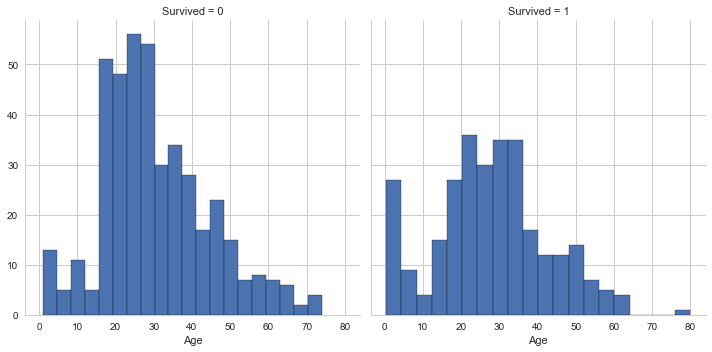

In [181]:
g = sns.FacetGrid(titanic_df, col='Survived',size=5)
g.map(plt.hist, 'Age', bins=20,ec='black')

 - Children had a high survival rate.
 - All passenger older than 75 survived.
 - Most casualties were older than 25.

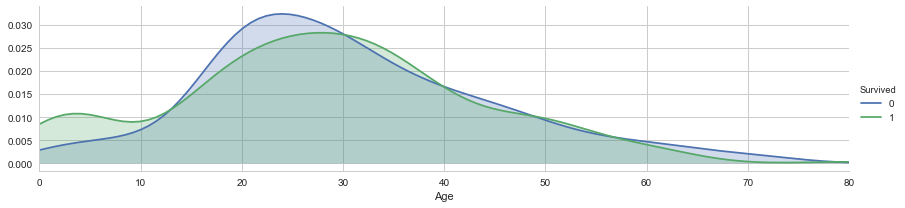

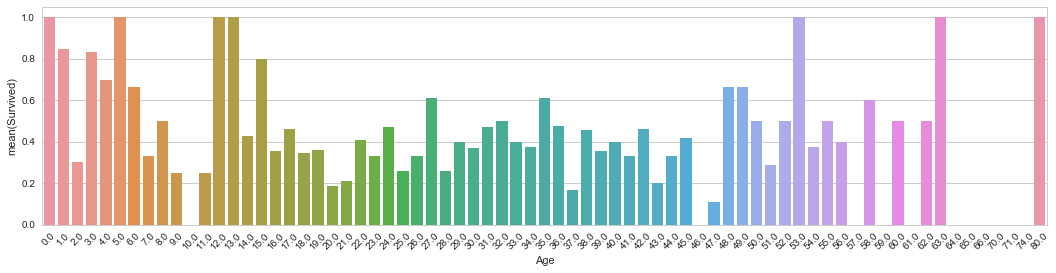

In [182]:
# We will now review the data presented above using other tools

facet = sns.FacetGrid(data=titanic_df,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0, titanic_df['Age'].max()))
facet.add_legend()

# Survival rate per age
# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age=titanic_df[["Age", "Survived"]].copy()
average_age.Age=average_age.Age.round(0)
average_age = average_age.groupby(['Age'],as_index=False).mean()

g = sns.barplot(x='Age', y='Survived', data=average_age)
plt.xticks(rotation=45);

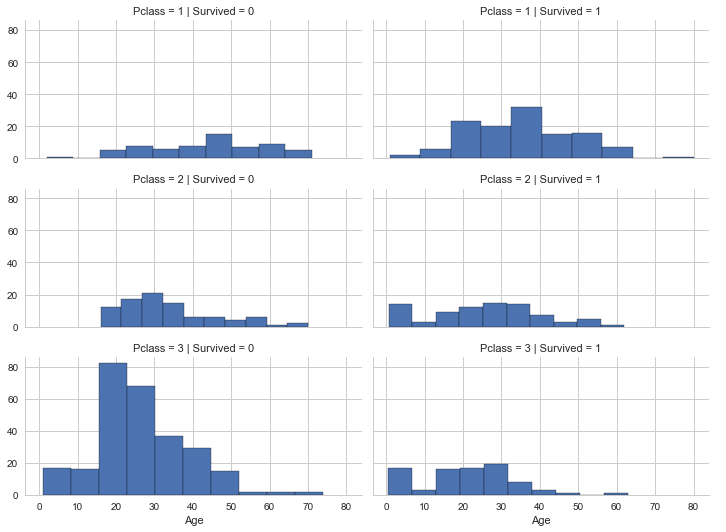

In [183]:
grid = sns.FacetGrid(titanic_df,row='Pclass',col='Survived',size=2.5, aspect=2)
grid.map(plt.hist,'Age',ec='black')
grid.add_legend();

 - The age distribution varies per class.
 - Most passengers from the first class survived.
 - Young passengers from the second and third class survived.

## 1.4. Correlation of categorical features

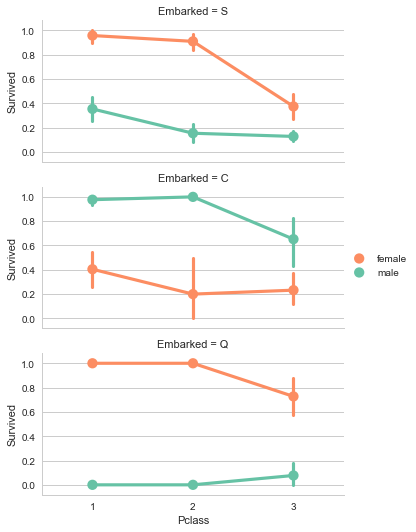

In [184]:
grid = sns.FacetGrid(titanic_df, row='Embarked', size=2.5, aspect=2.0)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex',palette="Set2")
grid.add_legend();

 - Except from Embarked=C, females had a higher survival rate.
 - The Embarked feature when combined with the Sex and Pclass is highly correlated with the survival rate.

# 2. Data wrangling
Now that we have a better understanding of the correlation between the survival rate and the different features of the dataset, we can make decision regarding the missing value and also create new features.

## 2.1. Drop features

The first step of the data cleaning process consists of dropping features that are not correlation with the survival rate or that cannot be used in our model.

In [185]:
titanic_df.drop(['Ticket','Cabin'],axis=1,inplace=True)
test_set_df.drop(['Ticket','Cabin'],axis=1,inplace=True)

## 2.2. New features
Even though the Name feature cannot be used as such, it contains the title of the passenger. This additional feature might present a correlation with the survival rate.  
Note: the targetted substring is located between a space character and a period.

In [186]:
titanic_df['Title'] = titanic_df.Name.str.extract(r' ([A-Za-z]+)\.',expand=False)
test_set_df['Title'] = test_set_df.Name.str.extract(r' ([A-Za-z]+)\.',expand=False)

In [187]:
titanic_df.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [188]:
titanic_df.Title.value_counts().sort_index()

Capt          1
Col           2
Countess      1
Don           1
Dr            7
Jonkheer      1
Lady          1
Major         2
Master       40
Miss        182
Mlle          2
Mme           1
Mr          517
Mrs         125
Ms            1
Rev           6
Sir           1
Name: Title, dtype: int64

Several of these titles can be replaced with their more common form. Moreover, a large subset of the Title feature is made of unique titles. The unique title will be grouped together.

In [189]:
titanic_df.Title = titanic_df.Title.replace(['Capt','Col','Countess','Don','Dr','Jonkheer',
                                            'Lady','Major','Rev','Sir'],'Special')
titanic_df.Title = titanic_df.Title.replace(['Mlle','Ms'],'Miss')
titanic_df.Title = titanic_df.Title.replace(['Mme'],'Mrs')

test_set_df.Title = test_set_df.Title.replace(['Capt','Col','Countess','Don','Dr','Jonkheer',
                                            'Lady','Major','Rev','Sir'],'Special')
test_set_df.Title = test_set_df.Title.replace(['Mlle','Ms'],'Miss')
test_set_df.Title = test_set_df.Title.replace(['Mme'],'Mrs')

In [190]:
titanic_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Special,0.347826


In order to be used in our model, the Title feature needs to be converted into numerical values.

In [191]:
title_dict = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

In [192]:
titanic_df.Title=titanic_df.Title.map(title_dict)
titanic_df.Title=titanic_df.Title.fillna(0)
titanic_df.Title=titanic_df.Title.astype(int)

test_set_df.Title=test_set_df.Title.map(title_dict)
test_set_df.Title=test_set_df.Title.fillna(0)
test_set_df.Title=test_set_df.Title.astype(int)

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


Now that we have extracted the necessary information, we can drop the Name feature.

In [193]:
titanic_df.drop(['Name'], axis=1,inplace=True)
titanic_df.drop(['PassengerId'], axis=1,inplace=True)
test_set_df.drop(['Name'], axis=1,inplace=True)
full_lst = [titanic_df, test_set_df]
titanic_df.shape, test_set_df.shape

((891, 9), (418, 9))

## 2.3. Feature convertion
In order to be used in our model, the categorical features need to be converted into numerical values.

In [194]:
for set_df in full_lst:
    set_df.Sex = set_df.Sex.map({'female':1,'male':0}).astype(int)  

## 2.4. Feature completion
Several feature of the dataset contain null values. They need to be completely filled in order to be used in our mode.

### 2.4.1. Age

The first feature to be estimated is the age of the passengers. To do so, several options can be used:
 1. Assume a normal distribution of the age around the mean and perform random guesses.
 2. Try to guess the age based on the correlation between the age distribution and the passenger's class and gender.
 
While the first method might be easier to implement, it introduces random noise in the model. Moreover, because the sets presented below are not all symmetrical, we will be using the medians to fill the missing values.

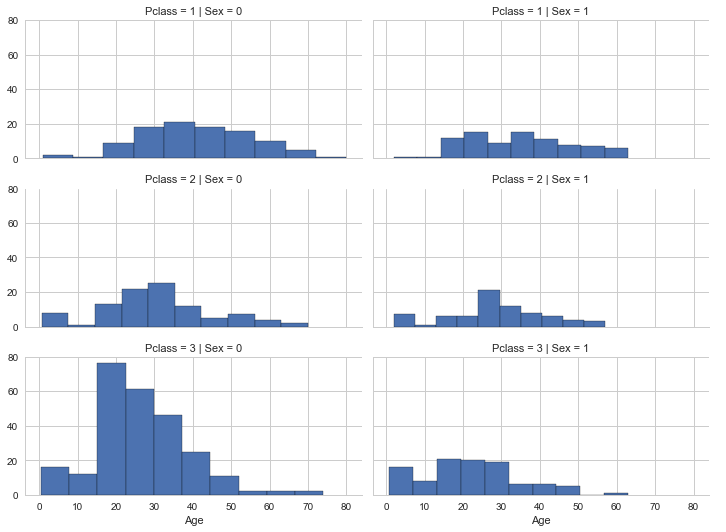

In [195]:
# Plot the age distribution as a function of the Sex and Pclass
grid = sns.FacetGrid(titanic_df,row='Pclass',col='Sex',size=2.5, aspect=2)
grid.map(plt.hist,'Age',ec='black')
grid.add_legend();

In [196]:
for set_df in full_lst:
    
    age_dist = np.zeros((2,3))
    
    # Outer loop corresponds to the passenger's gender
    for gender in range(2):
        
        # Inner loop corresponds to the passenger's class
        for pclass in range(0,3):
            
            # Store median
            age_dist[gender,pclass] = set_df[(set_df.Sex==gender) & (set_df.Pclass==pclass+1)].Age.dropna().median()
            
            # Replace null values by median
            set_df.loc[(set_df.Age.isnull()) & 
                       (set_df.Sex == gender) & 
                       (set_df.Pclass == pclass+1),'Age'] = age_dist[gender,pclass]
    
    set_df.Age = set_df.Age.astype(int)

In order to use the Age feature in our model, it is necessary to group the different age values by age groups.

In [197]:
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], 10)
titanic_df[['AgeGroup', 'Survived']].groupby(['AgeGroup'], as_index=False).mean().sort_values(by='AgeGroup', ascending=True)

,AgeGroup,Survived
0,"(-0.08, 8.0]",0.666667
1,"(8.0, 16.0]",0.413043
2,"(16.0, 24.0]",0.400000
3,"(24.0, 32.0]",0.287273
4,"(32.0, 40.0]",0.439189
5,"(40.0, 48.0]",0.352941
6,"(48.0, 56.0]",0.466667
7,"(56.0, 64.0]",0.375000
8,"(64.0, 72.0]",0.000000
9,"(72.0, 80.0]",0.500000


Now that we have identified a correlation between the age groups and the survival rate, we can transform the age group feature into a numerical values.

In [198]:
titanic_df.drop(['AgeGroup'],inplace=True,axis=1)
for set_df in full_lst:    
    set_df.loc[ set_df['Age'] <= 8, 'Age'] = 0
    set_df.loc[(set_df['Age'] > 8) & (set_df['Age'] <= 16), 'Age'] = 1
    set_df.loc[(set_df['Age'] > 16) & (set_df['Age'] <= 24), 'Age'] = 2
    set_df.loc[(set_df['Age'] > 24) & (set_df['Age'] <= 32), 'Age'] = 3
    set_df.loc[(set_df['Age'] > 32) & (set_df['Age'] <= 40), 'Age'] = 4
    set_df.loc[(set_df['Age'] > 40) & (set_df['Age'] <= 48), 'Age'] = 5
    set_df.loc[(set_df['Age'] > 48) & (set_df['Age'] <= 56), 'Age'] = 6
    set_df.loc[(set_df['Age'] > 48) & (set_df['Age'] <= 64), 'Age'] = 6
    set_df.loc[(set_df['Age'] > 48) & (set_df['Age'] <= 72), 'Age'] = 7             
    set_df.loc[ set_df['Age'] > 72, 'Age']=8

### 2.4.2. Family size 

We have previously showed that the number of family members impacted the survival rate.

In [199]:
for set_df in full_lst:
    set_df['FamilySize'] = set_df['Parch']+set_df['SibSp']+1

titanic_df[['FamilySize', 'Survived']].groupby(['FamilySize']).mean().sort_values(by='Survived',ascending=False)

,Survived
FamilySize,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


In order to refine the classification, we add one more feature that corresponds to True is the passenger travels alone, False else.

In [200]:
for set_df in full_lst:
    set_df['IsAlone'] = set_df.FamilySize==0
    set_df['IsAlone'] = set_df['IsAlone'].astype(int)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,2,1,0,7.2500,S,1,2,0
1,1,1,1,4,1,0,71.2833,C,3,2,0
2,1,3,1,3,0,0,7.9250,S,2,1,0
3,1,1,1,4,1,0,53.1000,S,3,2,0
4,0,3,0,4,0,0,8.0500,S,1,1,0


### 2.4.3. Embarkation

In [201]:
titanic_df[['Embarked', 'Survived']].groupby(['Embarked']).mean().sort_values(by='Survived',ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [202]:
titanic_df[['Embarked']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
Embarked    889 non-null object
dtypes: object(1)
memory usage: 7.0+ KB


We replace the two null values by the most frequent location.

In [203]:
for set_df in full_lst:
    set_df['Embarked'] = set_df['Embarked'].fillna(titanic_df.Embarked.dropna().mode()[0])

We now convert the letters corresponding to each location into numerical values:

In [204]:
for set_df in full_lst:
    set_df['Embarked'] =set_df['Embarked'].map( {'S': 0, 'Q': 1, 'C': 2} ).astype(int)

### 2.4.4. Fare

The fare is the final feature to be completed and converted to be used in our model. We start by filling the missing values using the median of the fare.

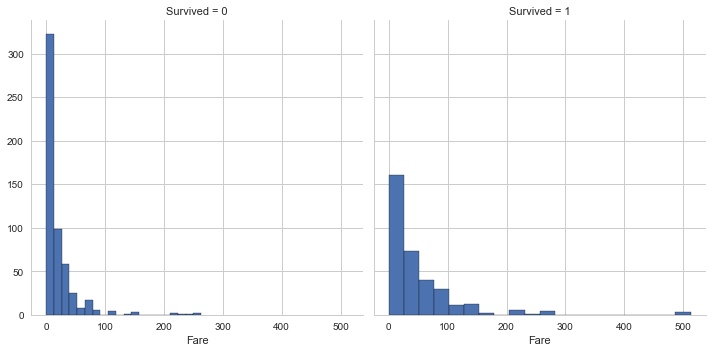

In [205]:
g = sns.FacetGrid(titanic_df, col='Survived',size=5)
g.map(plt.hist, 'Fare', bins=20,ec='black');

In [206]:
for set_df in full_lst:
    set_df['Fare'] = set_df['Fare'].fillna(titanic_df.Fare.dropna().median())
    
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,2,1,0,7.2500,0,1,2,0
1,1,1,1,4,1,0,71.2833,2,3,2,0
2,1,3,1,3,0,0,7.9250,0,2,1,0
3,1,1,1,4,1,0,53.1000,0,3,2,0
4,0,3,0,4,0,0,8.0500,0,1,1,0


In [207]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null int64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
FamilySize    891 non-null int64
IsAlone       891 non-null int64
dtypes: float64(1), int64(10)
memory usage: 76.6 KB


Since the fare distribution has a non-homogeneous distribution, we create the fare groups based on quantiles.

In [208]:
titanic_df['FareGroup'] = pd.qcut(titanic_df['Fare'], 5)
titanic_df[['FareGroup', 'Survived']].groupby(['FareGroup'], as_index=False).mean().sort_values(by='FareGroup', ascending=True)

,FareGroup,Survived
0,"(-0.001, 7.854]",0.217877
1,"(7.854, 10.5]",0.201087
2,"(10.5, 21.679]",0.424419
3,"(21.679, 39.688]",0.444444
4,"(39.688, 512.329]",0.642045


In [209]:
titanic_df.drop(['FareGroup'],axis=1,inplace=True)
for set_df in full_lst:
    set_df.loc[ set_df['Fare'] <= 7.854, 'Fare'] = 0
    set_df.loc[(set_df['Fare'] > 7.854) & (set_df['Fare'] <= 10.50), 'Fare'] = 1
    set_df.loc[(set_df['Fare'] > 10.50) & (set_df['Fare'] <= 21.679), 'Fare']   = 2
    set_df.loc[(set_df['Fare'] > 21.679) & (set_df['Fare'] <= 39.688), 'Fare']   = 3
    set_df.loc[ set_df['Fare'] > 39.688, 'Fare'] = 4
    set_df['Fare'] = set_df['Fare'].astype(int)

## 2.5. Validation 

In [210]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null int64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null int64
Embarked      891 non-null int64
Title         891 non-null int64
FamilySize    891 non-null int64
IsAlone       891 non-null int64
dtypes: int64(11)
memory usage: 76.6 KB


In [211]:
test_set_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null int64
Embarked       418 non-null int64
Title          418 non-null int64
FamilySize     418 non-null int64
IsAlone        418 non-null int64
dtypes: int64(11)
memory usage: 36.0 KB


In [212]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,2,1,0,0,0,1,2,0
1,1,1,1,4,1,0,4,2,3,2,0
2,1,3,1,3,0,0,1,0,2,1,0
3,1,1,1,4,1,0,4,0,3,2,0
4,0,3,0,4,0,0,1,0,1,1,0


In [239]:
test_set_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,892,3,0,4,0,0,0,1,1,1,0
1,893,3,1,5,1,0,0,0,3,2,0
2,894,2,0,6,0,0,1,1,1,1,0
3,895,3,0,3,0,0,1,0,1,1,0
4,896,3,1,2,1,1,2,0,3,3,0


# 3. Predictions

The first and most important step of the predictive process consists of the selection of the algorithm. This choice is based on the nature of the problem and the feature to etimate. In our case, we are aiming at establishing a relationship between the features listed above and the Survived feature. This is done by using a supervised learning algorithm trained using the *titanic_df* data frame. To summurize, we are looking for one of the following methods which combine classification and regression:
- Random forest
- Logistic Regression
- Decision Tree
- k-Nearest Neighbors
- ...

Since the data has been cleaned and prepared, we can now extract the *Survived* feature from the training set.

In [221]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [222]:
X_train = titanic_df.drop('Survived',axis=1)
Y_train = titanic_df.Survived
X_test = test_set_df.drop('PassengerId',axis=1)

X_train.shape,Y_train.shape,X_test.shape

((891, 10), (891,), (418, 10))

In [223]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null int64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null int64
Embarked      891 non-null int64
Title         891 non-null int64
FamilySize    891 non-null int64
IsAlone       891 non-null int64
dtypes: int64(10)
memory usage: 69.7 KB


In [224]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

83.390000000000001

In [225]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.840000000000003

In [226]:
# K-clustering

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

87.090000000000003

In [227]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

80.700000000000003

In [228]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

81.480000000000004

In [229]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

83.280000000000001

In [230]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

80.700000000000003

In [231]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

90.569999999999993

In [232]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

90.569999999999993

In [233]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,90.57
8,Decision Tree,90.57
1,KNN,87.09
0,Support Vector Machines,83.84
2,Logistic Regression,83.39
7,Linear SVC,83.28
5,Perceptron,81.48
4,Naive Bayes,80.70
6,Stochastic Gradient Decent,80.70


In [238]:
submission = pd.DataFrame({
        "PassengerId": test_set_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('./output/submission.csv', index=False)